In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os

# Adding parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src import colony

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
def getSLConcArray(col):
    # Return an array of concentrations for all SLs in a given colony
    # Rows correspond to a unique SL, columns correspond to a given time step provided by col.tList
    concList = []
    for sl in col.slList:
        concList.append(sl.concentrationList)
    return np.asarray(concList)

def getTimeLastSL(col, threshold):
    slConcArray = getSLConcArray(col)
    # Get the idx where each SL exceeds the threshold
    tIdx = np.argmax(slConcArray > threshold, axis = 1)
    slIdx = np.argmax(tIdx)
    # The time for the last SL to exceed threshold is given by:
    return col.tList[tIdx[slIdx]]

In [3]:
# Time steps used
# dts = [1e1, 5e0, 1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
dts = [1e1, 5e0, 1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4]

t50list = []
t90list = []
t98list = []
# Loop through the saved files and plot the
for dt in dts:
    # filename = '../results/tConvergence/dt' + str(dt) + '/model.pkl'
    filename = '../results/tConvergenceFine/dt' + str(dt) + '/model.pkl'
    with open(filename, 'rb') as handle:
        col = pickle.load(handle)
    # Now extract the time at which total concentration exceeds a certain value
    t50list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.5)])
    t90list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.9)])
    t98list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.98)])

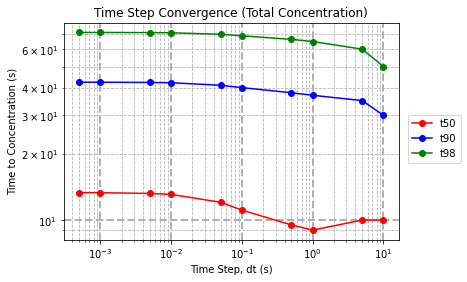

In [4]:
# Make plots of the t50, t90, t98 vs dt
plt.loglog(dts, t50list, 'ro-', label = 't50')
plt.loglog(dts, t90list, 'bo-', label = 't90')
plt.loglog(dts, t98list, 'go-', label = 't98')
plt.xlabel('Time Step, dt (s)')
plt.ylabel('Time to Concentration (s)')
plt.title('Time Step Convergence (Total Concentration)')
plt.legend(bbox_to_anchor=(1.2, 0.6))
plt.grid(which = 'major', linestyle = '--', linewidth = 2)
plt.grid(which = 'minor', linestyle = '--')
plt.show()

In [5]:
print('\\begin{tabular}{|c|c|c|c|}')
print('\\hline')
print('dt & t50 & t90 & t98 \\\\')
print('\\hline')
for i, dt in enumerate(dts):
    print('%.4f & %.3f & %.3f & %.3f \\\\' %(dt, t50list[i], t90list[i], t98list[i]))
print('\\hline')
print('\\end{tabular}')

\begin{tabular}{|c|c|c|c|}
\hline
dt & t50 & t90 & t98 \\
\hline
10.0000 & 10.000 & 30.000 & 50.000 \\
5.0000 & 10.000 & 35.000 & 60.000 \\
1.0000 & 9.000 & 37.000 & 65.000 \\
0.5000 & 9.500 & 38.000 & 66.500 \\
0.1000 & 11.100 & 40.100 & 69.000 \\
0.0500 & 12.050 & 41.100 & 70.150 \\
0.0100 & 13.090 & 42.190 & 71.230 \\
0.0050 & 13.220 & 42.320 & 71.370 \\
0.0010 & 13.322 & 42.430 & 71.483 \\
0.0005 & 13.335 & 42.444 & 71.498 \\
\hline
\end{tabular}


In [6]:
# Time steps used
dts = [1e1, 5e0, 1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
# dts = [1e1, 5e0, 1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4]

t50list = []
t90list = []
t98list = []
# Loop through the saved files and plot the
for dt in dts:
    filename = '../results/tConvergence/dt' + str(dt) + '/model.pkl'
    with open(filename, 'rb') as handle:
        col = pickle.load(handle)
    # Now extract the time at which the last sl exceeds a certain concentration
    t50list.append(getTimeLastSL(col, 0.5))
    t90list.append(getTimeLastSL(col, 0.9))
    t98list.append(getTimeLastSL(col, 0.98))

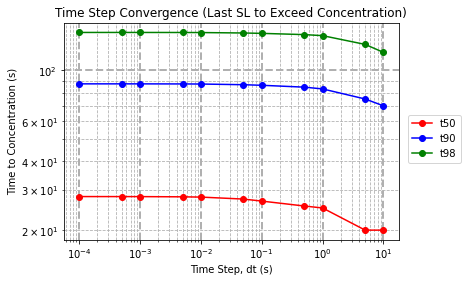

In [7]:
# Make plots of the t50, t90, t98 vs dt
plt.loglog(dts, t50list, 'ro-', label = 't50')
plt.loglog(dts, t90list, 'bo-', label = 't90')
plt.loglog(dts, t98list, 'go-', label = 't98')
plt.xlabel('Time Step, dt (s)')
plt.ylabel('Time to Concentration (s)')
plt.title('Time Step Convergence (Last SL to Exceed Concentration)')
plt.legend(bbox_to_anchor=(1.2, 0.6))
plt.grid(which = 'major', linestyle = '--', linewidth = 2)
plt.grid(which = 'minor', linestyle = '--')
plt.show()

In [8]:
print('\\begin{tabular}{|c|c|c|c|}')
print('\\hline')
print('dt & t50 & t90 & t98 \\\\')
print('\\hline')
for i, dt in enumerate(dts):
    print('%.4f & %.3f & %.3f & %.3f \\\\' %(dt, t50list[i], t90list[i], t98list[i]))
print('\\hline')
print('\\end{tabular}')

\begin{tabular}{|c|c|c|c|}
\hline
dt & t50 & t90 & t98 \\
\hline
10.0000 & 20.000 & 70.000 & 120.000 \\
5.0000 & 20.000 & 75.000 & 130.000 \\
1.0000 & 25.000 & 83.000 & 142.000 \\
0.5000 & 25.500 & 84.500 & 143.500 \\
0.1000 & 26.800 & 86.100 & 145.300 \\
0.0500 & 27.350 & 86.600 & 145.850 \\
0.0100 & 27.900 & 87.200 & 146.500 \\
0.0050 & 27.975 & 87.275 & 146.580 \\
0.0010 & 28.033 & 87.339 & 146.644 \\
0.0005 & 28.040 & 87.347 & 146.652 \\
0.0001 & 28.047 & 87.353 & 146.659 \\
\hline
\end{tabular}


In [5]:
filename = '../results/tConvergenceFine/dt' + str(0.01) + '/model.pkl'
with open(filename, 'rb') as handle:
    col = pickle.load(handle)
arr = getSLConcArray(col)

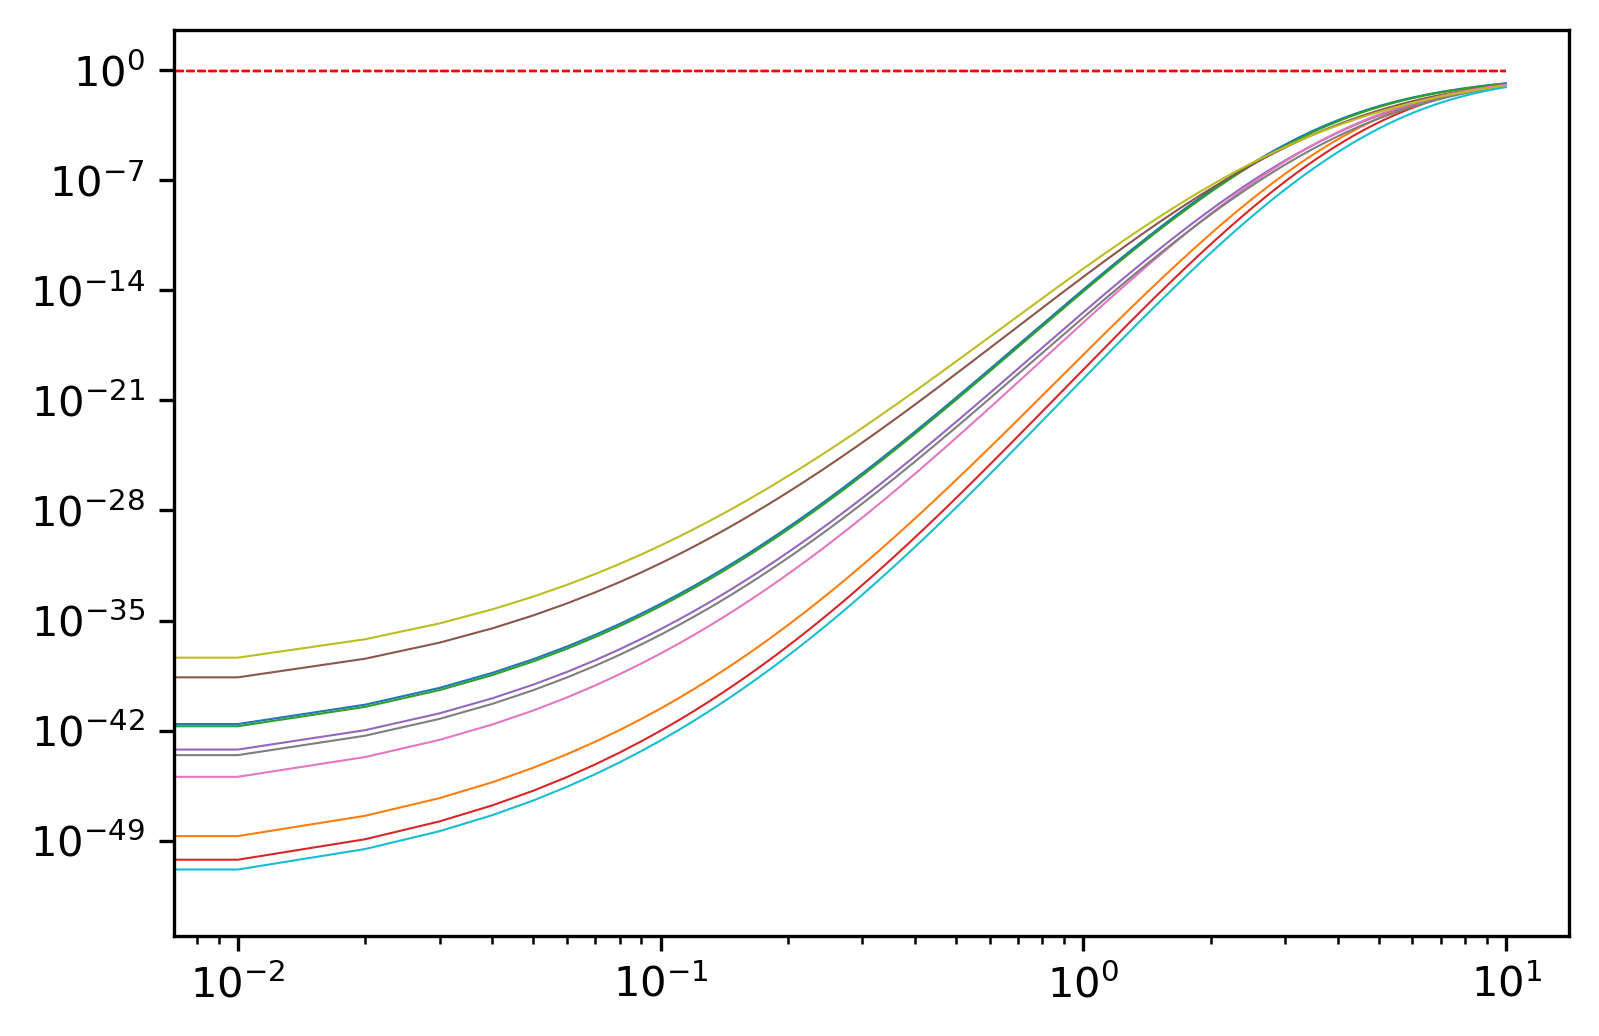

In [25]:
k = 10
threshold = 0.9

tIdx = np.argmax(arr > threshold, axis = 1)
kIdx = np.argsort(tIdx)[-k:]
start = 0
end = np.argmax(tIdx)
fig = plt.figure(dpi = 300)
for idx in kIdx:
    plt.loglog(col.tList[start:end], arr[idx, start:end], '-', linewidth = 0.5)
    plt.hlines(threshold, xmin = col.tList[start], xmax = col.tList[end], linestyles='--', colors='r', linewidth = 0.5)